<a href="https://colab.research.google.com/github/EsserMishelle/2023-10-NCR-Devin/blob/main/Spam_Detection_Using_TF_IDF_and_Supervised_Learning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
The goal of this project is to build and evaluate supervised machine learning models to classify email messages as spam or non-spam (ham). Due to class imbalance, model evaluation emphasizes precision, recall, and F1-score rather than accuracy alone.


In [1]:
# os.listdir(data_path)

In [2]:
import pandas as pd

df = pd.read_csv('spam.csv', encoding='latin-1')
df_raw = df.copy()

df.head(20)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


The dataset contains several empty columns and therefore are removed. Only the columns with text and label are retained for modeling.

In [3]:
# Rename the columns as 'label' and 'message'
if 'v1' in df.columns and 'v2' in df.columns:
  df = df[['v1', 'v2']]
  df.columns =['label', 'message']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Explore Data Analysis

In [4]:
display((df['label'].value_counts()))
df['label'].value_counts(normalize=True)


,count
label,
ham,4825
spam,747


,proportion
label,
ham,0.865937
spam,0.134063


The dataset is imbalanced, with approximately 87% ham and 13% spam messages. This imbalance motivates the use of precision, recall, and F1-score as primary evaluation metrics.


In [5]:
v2_length = df['message'].apply(len)
# v2_length.describe()

va_word_length = df['message'].apply(lambda x: len(x.split()))
va_word_length.describe()


,message
count,5572.000000
mean,15.494436
std,11.329427
min,1.000000
25%,7.000000
50%,12.000000
75%,23.000000
max,171.000000


## Structure Cleaning/Label Cleaning

In [6]:
df.isnull().sum()

,0
label,0
message,0


Spam messages are encoded as class 1, while ham messages are encoded as class 0 to support binary classification.


In [7]:
# Converting labels to numberic. Spam will be considered as class (1) in this
# spam detection project.
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

## Message Cleaning/Normalization

In [8]:
import re

def clean_text(text):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text) # Remove non-regex and keep the white space
  text = re.sub(r'\s+',' ', text).strip() # strip spaces from the above line
  text = text.lower() # lowercase it
  return text

# Apply the clean_text function to the message column
df['clean_message'] = df['message'].apply(clean_text)

## Build the CORPUS

In [9]:
corpus = df['clean_message'].tolist()

The CORPUS represents the full vocabulary learned from the training messages

## Vectorization
TF-IDF was selected to weight informative terms more heavily while reducing the influence of common words across messages.



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features = 3000)
X = vectorizer.fit_transform(corpus)

X.shape

(5572, 3000)

The text messages were transformed into a numerical feature matrix using TF-IDF vectorization, resulting in 3,000 features per message. This representation contains only numeric features and is suitable for supervised classification models.


## Modeling

Target Variable Definition


In [11]:
y = df['label_num']

Train-Test-Split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=42, stratify=y)
# Stratifcation preserves spam/ham imbalance ratio

## Baseline Model (Majority Class)
### Predict Ham

In [13]:
# Baseline model
import numpy as np
from sklearn.metrics import classification_report

# The baseline model predicts the majority class
# by assigning a value of 0 (ham) to every test instance using np.zeros_like(y_test)
y_pred = np.zeros_like(y_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       966
           1       0.00      0.00      0.00       149

    accuracy                           0.87      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.75      0.87      0.80      1115



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Logistic Regression (default parameters)

In [14]:
# logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



### The confusion matrix provides a class-level view of model prediction errors.


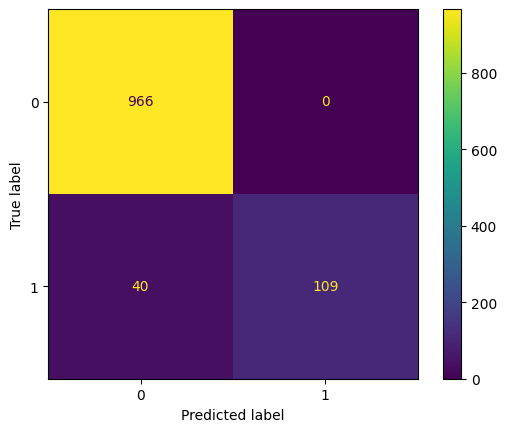

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

### Decision Tree (default parameters)
The Decision Tree model is included as a simple nonlinear baseline to illustrate the progression from linear models to ensemble methods.

In [16]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.87      0.84      0.86       149

    accuracy                           0.96      1115
   macro avg       0.92      0.91      0.92      1115
weighted avg       0.96      0.96      0.96      1115



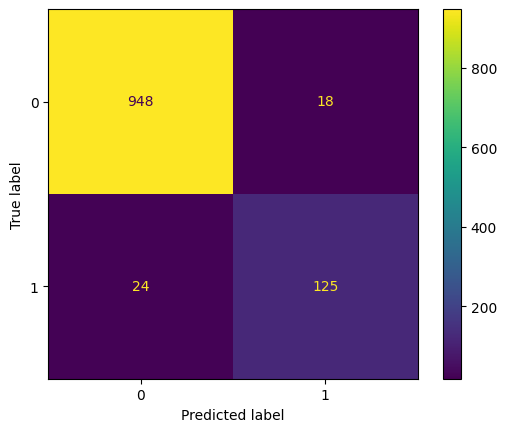

In [17]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.show()

### Random Forest (default parameters)


In [32]:
# This is the baseline ensemble model prior to parameter tuning.

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



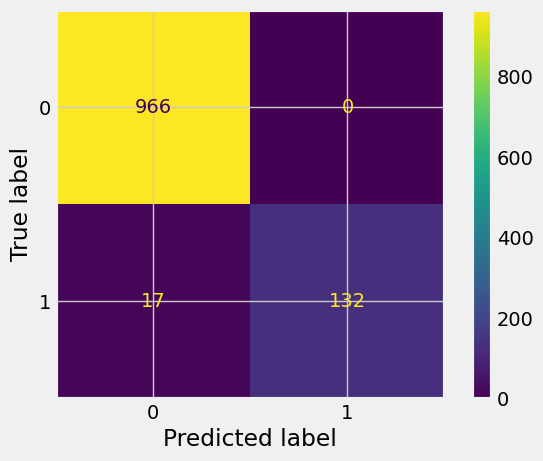

In [33]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

### Accuracy of Random Forest by Tree Depth

This chart illustrates how the accuracy of the Random Forest model varies with different tree depths.

/tmp/ipython-input-232543208.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


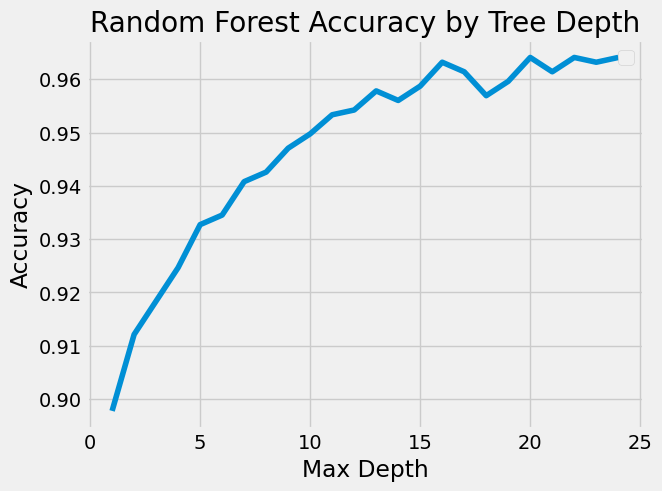

In [35]:
depths = range(1, 25)

plt.style.use('fivethirtyeight')
plt.plot(depths, [DecisionTreeClassifier(max_depth=d).fit(X_train, y_train).score(X_test, y_test) for d in depths])

plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.title('Random Forest Accuracy by Tree Depth')
plt.legend()

In [23]:

feature_importance_df = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importance_df.head(10))


      feature  importance
2746      txt    0.043581
1712   mobile    0.029046
1139     free    0.027319
648     claim    0.025461
2199    reply    0.022720
2311  service    0.019447
2922      won    0.019377
2100    prize    0.016774
2782   urgent    0.016253
2611     text    0.015780


## Tuned Random Forest Model -
Tuning the hyperparameters to improve recall for spam while maintaining reasonable precision

In [26]:
# Random Forest Tuned - tuning the parameters

from sklearn.ensemble import RandomForestClassifier
rf_tuned = RandomForestClassifier(n_estimators=100, max_depth= 5, min_samples_split=2, random_state=42)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       966
           1       1.00      0.10      0.18       149

    accuracy                           0.88      1115
   macro avg       0.94      0.55      0.56      1115
weighted avg       0.89      0.88      0.83      1115



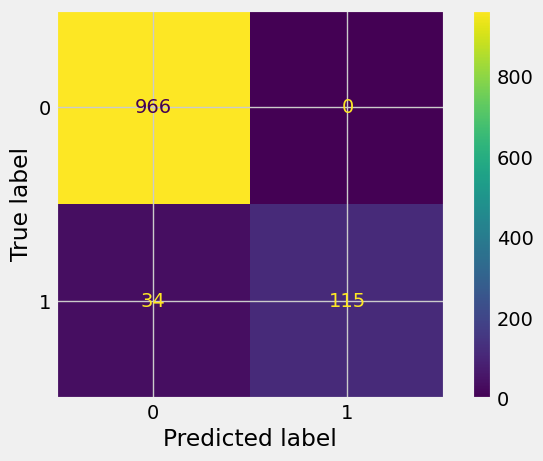

In [25]:
ConfusionMatrixDisplay.from_estimator(rf_tuned, X_test, y_test)
plt.show()

## Random Forest Analysis

The performance of the tuned random forest model (model 2) deterioated due to the constraint of max_depth = 5, which means the model has to stop learning afer limited number of splits. This leads to some drastic underfitting. The Recall changed from 0.83 to .10 and the f1-score reduced from 0.90 to 0.18.

The tuned model almost never predicted spam. But when it does, it's confident (precision ==1). Most spam slips through and has terrible recall. As a result, the model effectively behaved as an “almost ham” classifier.

Despite the substantial degradation in spam detection, overall accuracy declined only modestly (from 0.98 to 0.88). This occurs because the dataset is imbalanced and predicting the majority class (ham) most of the time still yields high accuracy. This result illustrates why accuracy alone is a misleading metric for spam detection.

While regularization is often used to reduce overfitting, the Random Forest model was not overfitting in this case. Excessive regularization removed useful signal, leading to underperformance.

A limited GridSearchCV was explored, but it did not significantly improve performance over the default Random Forest, so the simpler model was retained.




### ROC and AUC Charts for Spam and Ham Classification

ROC and AUC charts are used to evaluate the performance among the 2 models in separating spam from ham, showing the trade-offs between true positive and false positive rates at various threshold settings.

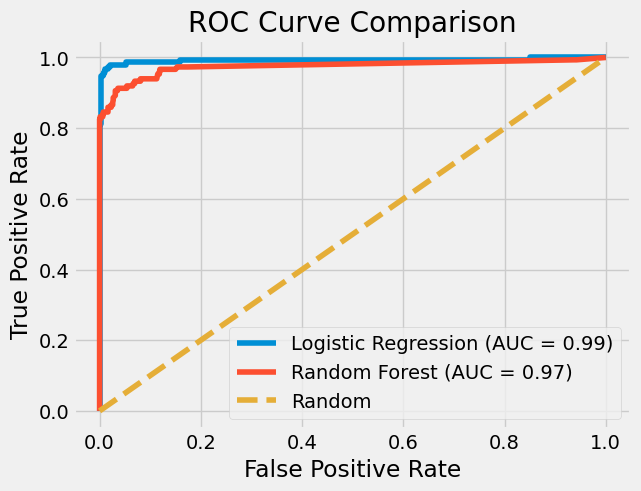

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

proba_lr = lr.predict_proba(X_test)[:,1]
proba_rf = rf.predict_proba(X_test)[:,1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, proba_rf)

auc_lr = roc_auc_score(y_test, proba_lr)
auc_rf = roc_auc_score(y_test, proba_rf)

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.show()

Both models achieve strong AUC values, indicating effective class separation across thresholds. The ROC analysis depicts precision, recall, and F1-score by providing a threshold-independent view of performance.

While ROC curves show overall discriminative ability, confusion matrices and class-specific metrics provide clearer insight into operational tradeoffs.



## Final Summary & Recommendation

### This project evaluated supervised learning models for spam classification using TF–IDF text features under class imbalance. Logistic Regression and Random Forest models are compared using precision, recall, F1-score, and ROC–AUC to assess both threshold-dependent and threshold-independent performance.

### Results show that excessive regularization in Random Forest leads to underfitting and poor spam recall, while the default Random Forest maintains strong precision with reasonable recall. ROC analysis indicates that both Logistic Regression and Random Forest achieve strong class separation, with Logistic Regression showing slightly higher AUC.

##**Recommendation:**  
### For a spam-filtering application where false positives are more costly than false negatives, the default Random Forest model is preferred due to its conservative and high-precision predictions. Logistic Regression remains a strong alternative due to its interpretability and well-calibrated probability outputs.
